# **Import Required Libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report


# **Define Paths to the Dataset**

In [ ]:
with_mask_path = '/content/drive/MyDrive/Dataset/data/with_mask'
without_mask_path = '/content/drive/MyDrive/Dataset/data/without_mask'

# **Create Data Generators**

In [ ]:
dataset_dir = '/content/drive/MyDrive/Dataset/data'
# train_path and val_path are no longer needed with validation_split

# Image Augmentation for training data
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # Use 20% of data for validation
)

# Validation generator (typically without augmentation but needs validation_split as well)
val_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Must match the training generator's split
)

# Flow images for training
train_data = train_gen.flow_from_directory(
    dataset_dir, # Point to the main dataset directory
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training' # Specify this is for the training set
)

# Flow images for validation
val_data = val_gen.flow_from_directory(
    dataset_dir, # Point to the main dataset directory
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation' # Specify this is for the validation set
)

Found 800 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


# **Display Some Sample Images**

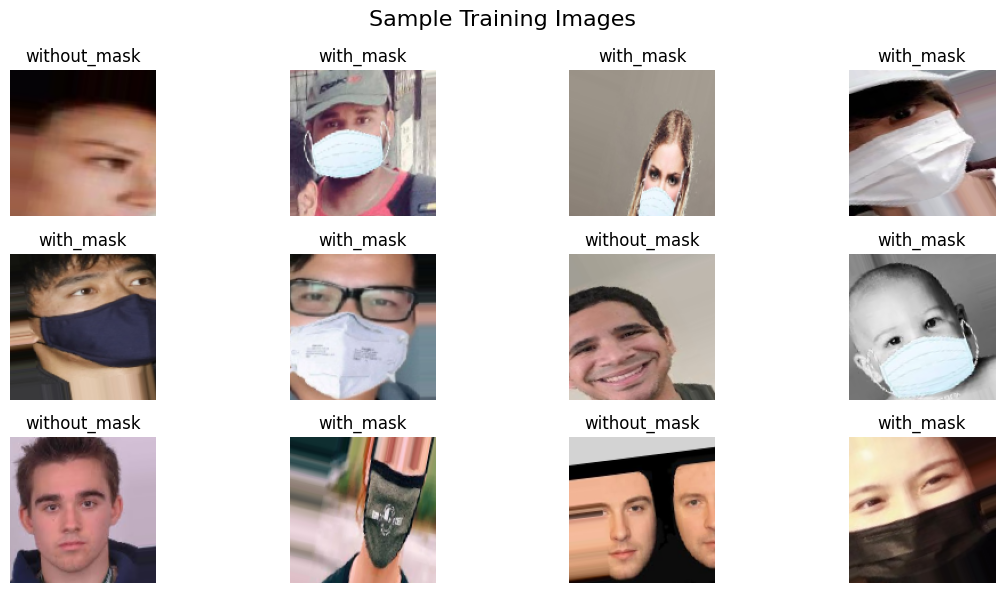

In [ ]:
class_labels = list(train_data.class_indices.keys())

x, y = next(train_data)
plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x[i])
    plt.title(class_labels[int(y[i])])
    plt.axis('off')
plt.suptitle("Sample Training Images", fontsize=16)
plt.tight_layout()
plt.show()


# **Build CNN Model**

In [ ]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(128,128,3)), # Explicit Input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Train the Model**

In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4991 - loss: 0.7781 - val_accuracy: 0.8636 - val_loss: 0.4848
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7613 - loss: 0.5289 - val_accuracy: 0.9091 - val_loss: 0.2643
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8273 - loss: 0.4239 - val_accuracy: 0.9040 - val_loss: 0.2468
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8190 - loss: 0.4153 - val_accuracy: 0.9242 - val_loss: 0.2205
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8075 - loss: 0.3857 - val_accuracy: 0.9192 - val_loss: 0.2158
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8603 - loss: 0.3535 - val_accuracy: 0.9596 - val_loss: 0.1650
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8282 - loss: 0.3577 - val_accuracy: 0.9394 - val_loss: 0.1822
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8299 - loss: 0.3515 - val_accuracy: 0.9242 - val_loss:

# **Smoothed Accuracy and Loss Visualization**

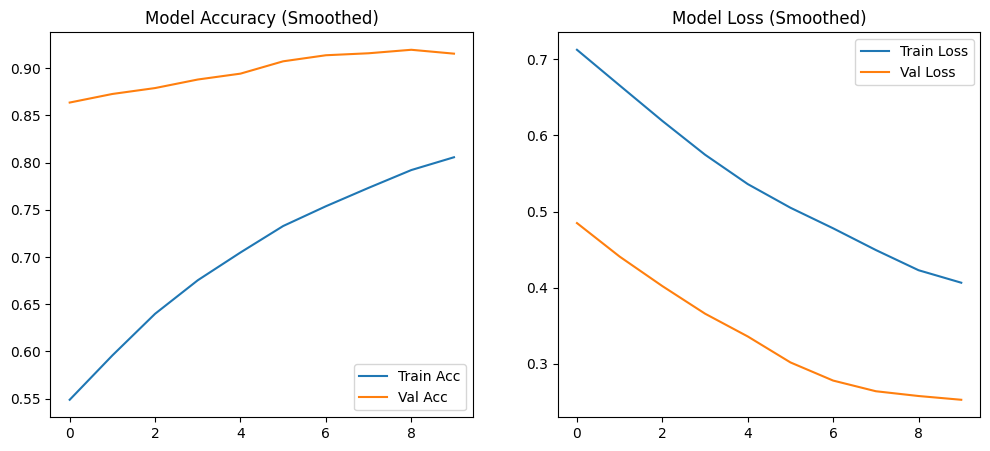

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for p in points:
        if smoothed:
            smoothed.append(smoothed[-1]*factor + p*(1-factor))
        else:
            smoothed.append(p)
    return smoothed

acc = smooth_curve(history.history['accuracy'])
val_acc = smooth_curve(history.history['val_accuracy'])
loss = smooth_curve(history.history['loss'])
val_loss = smooth_curve(history.history['val_loss'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend(); plt.title('Model Accuracy (Smoothed)')
plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend(); plt.title('Model Loss (Smoothed)')
plt.show()


# **Confusion Matrix & Classification Report**

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step


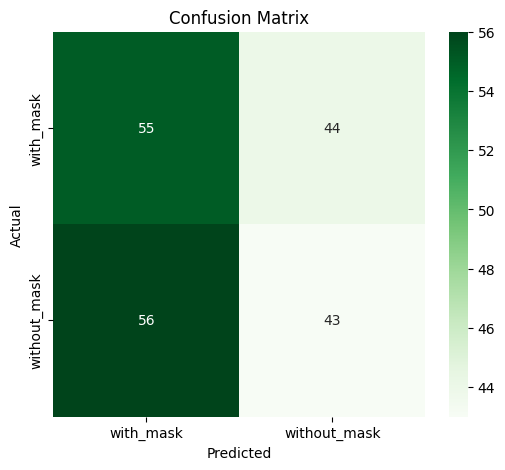

Classification Report:

              precision    recall  f1-score   support

   with_mask       0.50      0.56      0.52        99
without_mask       0.49      0.43      0.46        99

    accuracy                           0.49       198
   macro avg       0.49      0.49      0.49       198
weighted avg       0.49      0.49      0.49       198



In [ ]:
val_data.reset()
preds = model.predict(val_data)
y_pred = (preds > 0.5).astype("int32")
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


# **Show Correct & Incorrect Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


/tmp/ipython-input-1870655267.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_labels[int(y_pred_batch[i])]


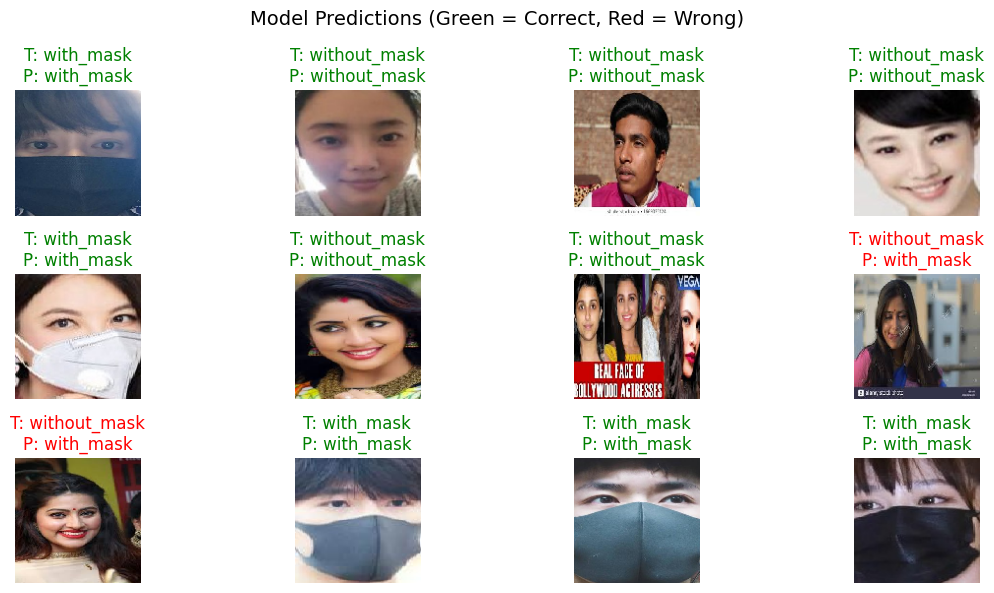

In [ ]:
val_data.reset()
x_batch, y_batch = next(val_data)
y_pred_batch = (model.predict(x_batch) > 0.5).astype("int32")

plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_batch[i])
    true_label = class_labels[int(y_batch[i])]
    pred_label = class_labels[int(y_pred_batch[i])]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"T: {true_label}\nP: {pred_label}", color=color)
    plt.axis('off')
plt.suptitle("Model Predictions (Green = Correct, Red = Wrong)", fontsize=14)
plt.tight_layout()
plt.show()


# **Feature Map Visualization (CNN Learning)**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


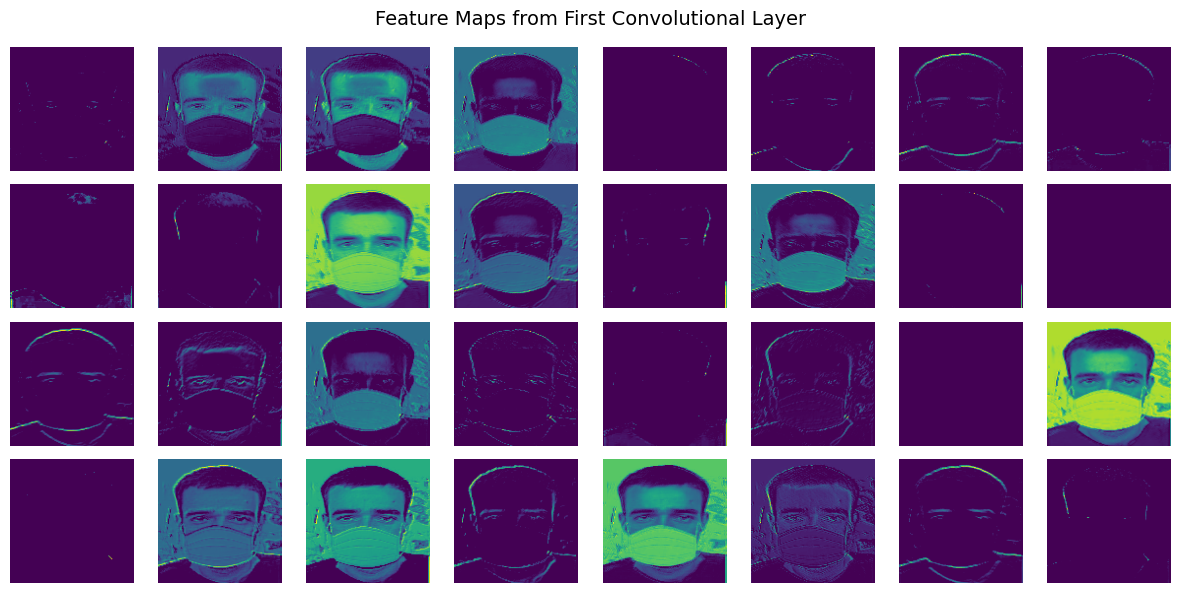

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import Input # Explicitly import Input

img_path = os.path.join(dataset_dir, 'with_mask', os.listdir(os.path.join(dataset_dir, 'with_mask'))[0])
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128,128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array/255.0, axis=0)

# Create a new input tensor that matches the model's expected input shape
input_for_activation_model = Input(shape=(128, 128, 3))

# Define the flow through the model to extract intermediate outputs
x = input_for_activation_model
layer_outputs_tensors = []
for layer in model.layers:
    x = layer(x) # Pass the tensor through the layer
    if isinstance(layer, Conv2D): # Collect Conv2D layer outputs
        layer_outputs_tensors.append(x)

activation_model = Model(inputs=input_for_activation_model, outputs=layer_outputs_tensors)
activations = activation_model.predict(img_array)

first_layer_activation = activations[0]
fig, axes = plt.subplots(4, 8, figsize=(12,6))
for i, ax in enumerate(axes.flat):
    if i < first_layer_activation.shape[-1]:
        ax.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
        ax.axis('off')
plt.suptitle("Feature Maps from First Convolutional Layer", fontsize=14)
plt.tight_layout()
plt.show()

# **Final Summary Dashboard**

In [ ]:
print("Final Validation Accuracy: {:.2f}%".format(history.history['val_accuracy'][-1]*100))
print("Final Training Accuracy: {:.2f}%".format(history.history['accuracy'][-1]*100))
print("\nModel Summary:")
model.summary()


Final Validation Accuracy: 89.90%
Final Training Accuracy: 86.00%

Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)